<a href="https://colab.research.google.com/github/aksingh21/Probabilistic-Programming-PyMC3/blob/master/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#LINEAR REGRESSION
#Generating Data 
#Initialize Random number generator
np.random.seed(123)

#True parameter Value
alpha, sigma = 1,1
beta = [1, 2.5]

#Size of dataset
size = 100

#Predictor variable
X1 = np.linspace(0, 1, size)
X2 = np.linspace(0,.2, size)


#Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

In [0]:
#Model Specification
from pymc3 import Model, Normal, HalfNormal

basic_model = Model()

with basic_model:
  
  #Priors for unknown model parameters
  alpha = Normal('alpha', mu=0, sd=10)
  beta = Normal('beta', mu=0, sd=10,shape=2)
  sigma = HalfNormal('sigma',sd=1)
  
  
  #Expected value of outcome
  mu = alpha +beta[0]*X1 + beta[1]*X2
  Y_obs = Normal('Y_obs', mu=mu, sd=sigma,observed = Y)

In [32]:
#Model Fitting

#Maximum a posterior methods

from pymc3 import find_MAP

map_estimate = find_MAP(model = basic_model)

print(map_estimate)

/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -164.8, ||grad|| = 7.6774: 100%|██████████| 17/17 [00:00<00:00, 818.84it/s]  

{'alpha': array(1.01365899), 'beta': array([1.46792489, 0.29358498]), 'sigma_log__': array(0.11438772), 'sigma': array(1.12118675)}


In [33]:
#Alternative optimizer method for finding the MAP
#Default method of finding MAP is Broyden-Fletcher-Goldfarb-Shanno


from scipy import optimize
map_estimate = find_MAP(model=basic_model, fmin= optimize.fmin_powell)

print(map_estimate)


/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:102: UserWarning: In future versions, set the optimization algorithm with a string. For example, use `method="L-BFGS-B"` instead of `fmin=sp.optimize.fmin_l_bfgs_b"`.
  warnings.warn('In future versions, set the optimization algorithm with a string. '
logp = -164.5:   5%|▌         | 271/5000 [00:00<00:02, 1704.16it/s]

Optimization terminated successfully.
         Current function value: 164.496957
         Iterations: 6
         Function evaluations: 271
{'alpha': array(1.01761779), 'beta': array([1.51424081, 0.03486478]), 'sigma_log__': array(0.11323002), 'sigma': array(1.1198895)}


In [34]:
from pymc3 import NUTS,sample

with basic_model:
  #obtain starting point via MAP
  start = find_MAP(fmin=optimize.fmin_powell)
  step = NUTS(scaling=start)
  trace = sample(2000, step, start=start)

/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:102: UserWarning: In future versions, set the optimization algorithm with a string. For example, use `method="L-BFGS-B"` instead of `fmin=sp.optimize.fmin_l_bfgs_b"`.
  warnings.warn('In future versions, set the optimization algorithm with a string. '
logp = -164.5:   5%|▌         | 271/5000 [00:00<00:02, 1937.68it/s]


Optimization terminated successfully.
         Current function value: 164.496957
         Iterations: 6
         Function evaluations: 271


Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta, alpha]
100%|██████████| 2500/2500 [00:07<00:00, 314.37it/s]
The number of effective samples is smaller than 25% for some parameters.


In [35]:
trace['alpha'][-5:]

array([0.85862455, 1.23645388, 1.23645388, 1.29843324, 1.3900389 ])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f1f73c7b8>,
      dtype=object)

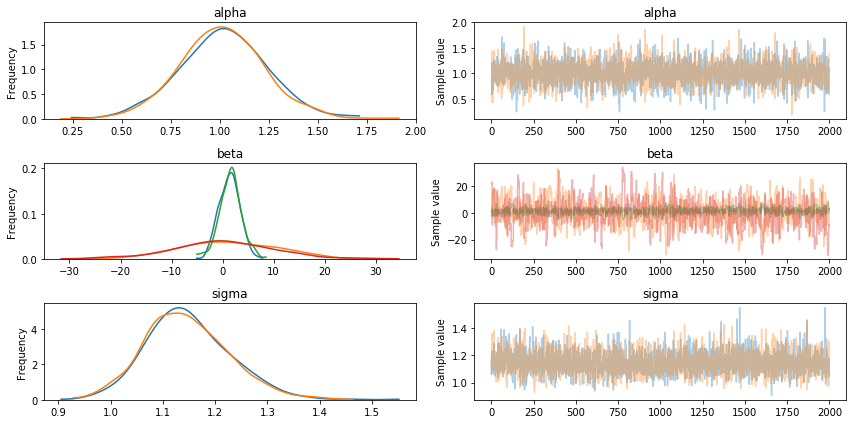

In [36]:
#Posterior Analysis
from pymc3 import traceplot
traceplot(trace)

In [38]:
from pymc3 import summary
summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,1.013091,0.219459,0.004309,0.569990,1.442338,2779.039344,0.999971
beta__0,1.419371,2.110263,0.085839,-2.817083,5.647668,547.425081,1.002697
beta__1,0.536250,10.336672,0.417847,-20.782783,20.571111,552.959038,1.002535
sigma,1.146357,0.079842,0.001307,0.997399,1.308097,3850.913167,1.000329
